In [37]:
#Importlari tanimlama
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [38]:
#Verisetini yukleme
data = pd.read_csv('Mall_Customers.csv')
df = pd.DataFrame(data)

In [39]:
#Verisetinin ilk satirlarini gosterme
df.head()

,CustomerID,Gender,Age,Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [40]:
#Veriseti hakkinda daha fazla bilgi alma
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Income          200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [41]:
#Verisetinin istatistiksel ozeti
data.describe()

,CustomerID,Age,Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [42]:
#Eksik deger kontrolu
print(df.isnull().sum)

<bound method DataFrame.sum of      CustomerID  Gender    Age  Income  Spending_Score
0         False   False  False   False           False
1         False   False  False   False           False
2         False   False  False   False           False
3         False   False  False   False           False
4         False   False  False   False           False
..          ...     ...    ...     ...             ...
195       False   False  False   False           False
196       False   False  False   False           False
197       False   False  False   False           False
198       False   False  False   False           False
199       False   False  False   False           False

[200 rows x 5 columns]>


In [43]:
#Eksik degerleri doldurma-cikarma
df = df.dropna() #Eksik veri cikarma
df.fillna(0) #Eksik verilere '0' yaz

,CustomerID,Gender,Age,Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


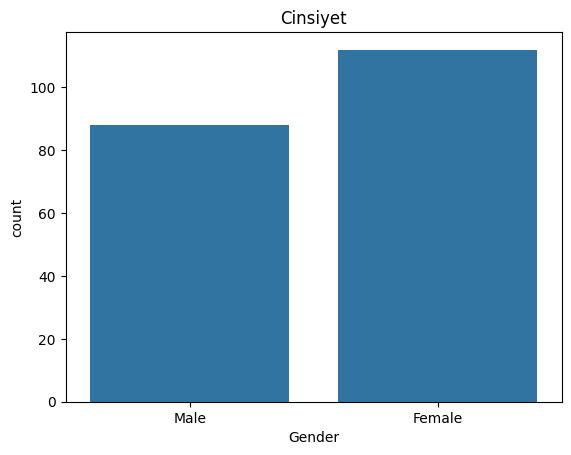

In [44]:
# 'Gender' verilerini gorsellestirme
sns.countplot(x = 'Gender', data = df)
plt.title('Cinsiyet')
plt.show()

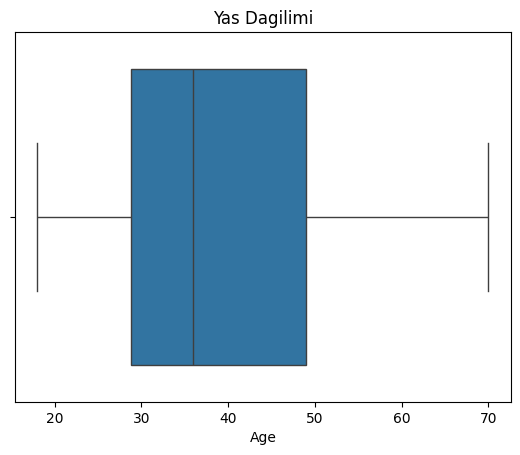

In [45]:
# 'Age' verilerini kutu grafigi ile gorsellestirme
sns.boxplot(x = 'Age', data =  df)
plt.title('Yas Dagilimi')
plt.show()

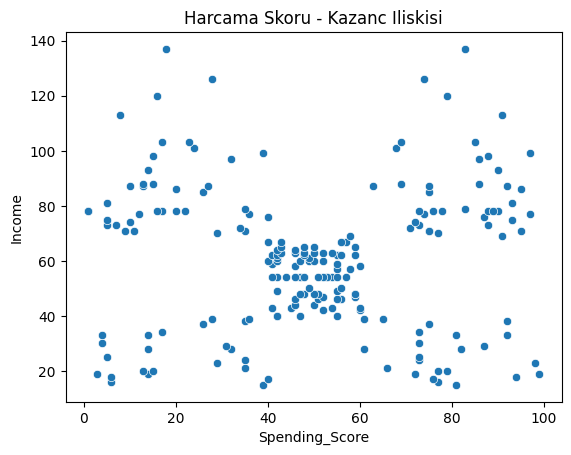

In [46]:
# 'Income_(k$)' ve 'Spending_Score_(1-100)' arasindaki iliskiyi gorsellestirme
sns.scatterplot(x = 'Spending_Score', y = 'Income',data = df)
plt.title('Harcama Skoru - Kazanc Iliskisi')
plt.show()

In [47]:
# Veriyi bagimsiz ve hedef degisken oalrak ikiye bolme
X = df.drop('Spending_Score',axis = 1)
X = df.drop('CustomerID',axis = 1)
Y = df['Spending_Score']

In [48]:
# Veriyi Olceklendirme(Yas verisi)
scaler = MinMaxScaler()
X_scaled = X.copy()
X_scaled['Age'] = scaler.fit_transform(X['Age'].values.reshape(-1,1))
print(X_scaled)

     Gender       Age  Income  Spending_Score
0      Male  0.019231      15              39
1      Male  0.057692      15              81
2    Female  0.038462      16               6
3    Female  0.096154      16              77
4    Female  0.250000      17              40
..      ...       ...     ...             ...
195  Female  0.326923     120              79
196  Female  0.519231     126              28
197    Male  0.269231     126              74
198    Male  0.269231     137              18
199    Male  0.230769     137              83

[200 rows x 4 columns]


In [49]:
# Cinsiyet verisini sayisal degerlere donusturme yapma (kadin = 0, erkek = 1)
gender_mapping = {'Female' : 0, 'Male' : 1}
X_scaled['Gender'] = X_scaled['Gender'].map(gender_mapping)
print(X_scaled)

     Gender       Age  Income  Spending_Score
0         1  0.019231      15              39
1         1  0.057692      15              81
2         0  0.038462      16               6
3         0  0.096154      16              77
4         0  0.250000      17              40
..      ...       ...     ...             ...
195       0  0.326923     120              79
196       0  0.519231     126              28
197       1  0.269231     126              74
198       1  0.269231     137              18
199       1  0.230769     137              83

[200 rows x 4 columns]


In [50]:
# Boyut azaltma(modelin boyutunu ve egitim suresini azaltmak icin modelin boyutu arttirilir)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)
print(X_reduced)

[[-4.69026863e+01  1.10235958e+00]
 [-3.59213499e+01  4.16409408e+01]
 [-5.45664614e+01 -3.10096318e+01]
 [-3.60027664e+01  3.75198984e+01]
 [-4.47117717e+01  1.54526474e+00]
 [-3.52989957e+01  3.62932919e+01]
 [-5.26363178e+01 -3.15334962e+01]
 [-2.96274981e+01  5.34054986e+01]
 [-5.24552883e+01 -3.46937726e+01]
 [-3.44145653e+01  3.19090371e+01]
 [-4.95792707e+01 -2.40766804e+01]
 [-2.73552047e+01  5.79693207e+01]
 [-4.83531734e+01 -2.33709966e+01]
 [-3.21419326e+01  3.64739879e+01]
 [-4.88749533e+01 -2.53014686e+01]
 [-3.16182254e+01  3.84031537e+01]
 [-4.21583009e+01 -4.32687035e+00]
 [-3.40519713e+01  2.55941223e+01]
 [-4.17962159e+01 -1.06434782e+01]
 [-2.37558133e+01  5.59582656e+01]
 [-3.92619145e+01 -5.11263037e+00]
 [-2.93261970e+01  3.15658741e+01]
 [-4.61414942e+01 -3.43296269e+01]
 [-2.83610969e+01  3.13040359e+01]
 [-4.08928539e+01 -2.64276486e+01]
 [-2.31122681e+01  3.92066412e+01]
 [-3.61863810e+01 -9.05335289e+00]
 [-2.86030683e+01  1.89369116e+01]
 [-3.54825349e+01 -1

In [51]:
# Veriyi egitim ve test kumelerine bolme
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.4, random_state = 1)

In [52]:
# Lojistik regresyon modeli olusturma
model = LogisticRegression()

# Modelin egitilmesi
model.fit(X_train,Y_train)

# Modelin test edilmesi
Y_pred = model.predict(X_test)

# Kesinlik skorunu hesaplama
accuracy = accuracy_score(Y_test, Y_pred)

print(accuracy)

0.0375


/home/esti002/miniconda3/envs/mlenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
def linear_train(x_train, x_test, y_train, y_test):
    from sklearn.linear_model import LinearRegression

    model = LinearRegression()

    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)

    
    return score

score = linear_train(X_train, X_test, Y_train, Y_test)
print(score)

1.0


In [54]:
asd

NameError: name 'asd' is not defined

In [ ]:
def ridge_and_lasso_train(x_train, x_test, y_train, y_test):
    from sklearn.linear_model import RidgeClassifier, Lasso

    ridge_model = RidgeClassifier(alpha=1.0)
    ridge_model.fit(x_train, y_train)

    lasso_model = Lasso(alpha=1.0)
    lasso_model.fit(x_train, y_train)

    ridge_pred = ridge_model.predict(x_test)
    lasso_pred = lasso_model.predict(x_test)

    from sklearn.metrics import accuracy_score

    ridge_accuracy = accuracy_score(y_test, ridge_pred)
    lasso_accuracy = accuracy_score(y_test, lasso_pred)

    return ridge_accuracy, lasso_accuracy

In [ ]:
def XGBoost_train(x_train, x_test, y_train, y_test):
    import xgboost as xgb
    from sklearn.metrics import accuracy_score

    # XGBoost sınıflandırma modelini eğitme
    xgb_model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100)
    xgb_model.fit(x_train, y_train)

    # Modeli test etme
    xgb_pred = xgb_model.predict(x_test)

    # Doğruluk oranını hesaplama
    accuracy = accuracy_score(y_test, xgb_pred)
    return accuracy

In [ ]:
def gradient_boosting_train(x_train, x_test, y_train, y_test):
    from sklearn.ensemble import GradientBoostingClassifier

    # Gradient Boosting modelini eğitme
    gb_model = GradientBoostingClassifier(n_estimators=100)
    gb_model.fit(x_train, y_train)

    # Modeli test etme
    y_pred = gb_model.predict(x_test)

    # Doğruluk (accuracy) hesaplama
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [ ]:
def MLP_train(x_train, x_test, y_train, y_test):
    from sklearn.neural_network import MLPClassifier

    # MLP modelini eğitme
    mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
    mlp_model.fit(x_train, y_train)

    # Modeli test etme
    y_pred = mlp_model.predict(x_test)

    # Doğruluk (accuracy) hesaplama
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [ ]:
linear = linear_train(X_train, X_test, Y_train, Y_test)
#ridge_and_lasso = ridge_and_lasso_train(X_train, X_test, Y_train, Y_test)
#XGBoost = XGBoost_train(X_train, X_test, Y_train, Y_test)
gradient_boosting = gradient_boosting_train(X_train, X_test, Y_train, Y_test)

In [ ]:
print("linear: ", linear)
#print("ridge: ", str(ridge_and_lasso[0])) 
#print("lasso: ", str(ridge_and_lasso[1]))
#print("XGBoost: ", XGBoost)
print("gradient_boosting: ", gradient_boosting)

linear:  1.0
gradient_boosting:  0.475
